In [17]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter


subreddit = 'UkrainianConflict'
stop = nltk.corpus.stopwords.words('english')

In [18]:
filename = f'./data/{subreddit}_filtered.csv'
dataframe = pd.read_csv(filename)

In [19]:
dataframe['title'] = dataframe['title'].apply(str) 
dataframe['self_text'] = dataframe['self_text'].apply(str) 
dataframe.loc[dataframe['self_text'].isin({ "remove", "delete", "nan"})]['self_text'] = ""
dataframe['wholetext'] = dataframe['title'] + dataframe['self_text']
submissions = dataframe.wholetext
print(dataframe.wholetext)

0       ukraine conflict world reaction sanction refug...
1       riamatotalpieceofshit ban me for share a pictu...
2       live update macron vow no weakness in reply to...
3       putin claim he be denazify ukraine and yet ukr...
4       in a rare act of public dissent against the wa...
                              ...                        
7859    a small shipment of lithuanian military aid ha...
7860    russian broadcast hack to play ukraine song on...
7861                         what be happen in kievdelete
7862    white house and eu nation announce expulsion o...
7863    i compile tip by online military user on how v...
Name: wholetext, Length: 7864, dtype: object


C:\Users\1408\AppData\Local\Temp\ipykernel_12896\3858455142.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[dataframe['self_text'].isin({ "remove", "delete", "nan"})]['self_text'] = ""


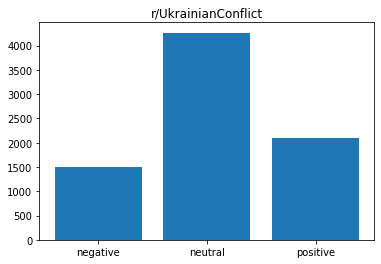

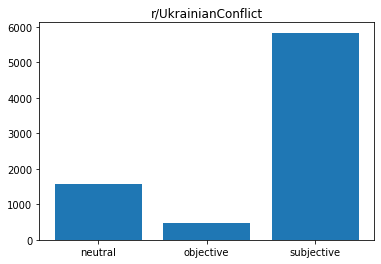

sentiments mean 0.022394534995773076
subjectivity mean 0.19333173285361344


In [20]:
from textblob import TextBlob
sentiments_mean = 0
subjectivity_mean = 0
sentiments = []
subjectivities = []

for submission in submissions:
    sentiment = TextBlob(submission).polarity
    sentiments_mean = sentiments_mean + sentiment
    subjectivity = TextBlob(submission).subjectivity
    subjectivity_mean = subjectivity_mean + subjectivity
    if sentiment > 0:
        sentiments.append('positive')
    elif sentiment < 0:
        sentiments.append('negative')
    else :
        sentiments.append('neutral')
    if subjectivity < 0.35:
        subjectivities.append('subjective')
    elif subjectivity > 0.65:
        subjectivities.append('objective')
    else:
        subjectivities.append('neutral')

plotSentiments(sentiments)
plotSentiments(subjectivities)

print(f"sentiments mean {sentiments_mean/len(submissions)}")
print(f"subjectivity mean {subjectivity_mean/len(submissions)}")


In [16]:
def plotSentiments(sentiments):
    a = dict(Counter(sentiments))

    keys = sorted(list(a.keys()))
    values = []

    for key in keys:
        values.append(a[key])

    plt.bar(range(len(a)), values, tick_label=keys)
    plt.title(f'r/{subreddit}')
    plt.show()